# Math 428 - Homework for 04/12/19
$$\frac{dy}{dx}=f(x,y)=-3xy^2+\frac{1}{1+x^3}$$
Given the initial condition $y(0)=0$. Find y(x) for $0\leq x\leq 5$.

## Part 1

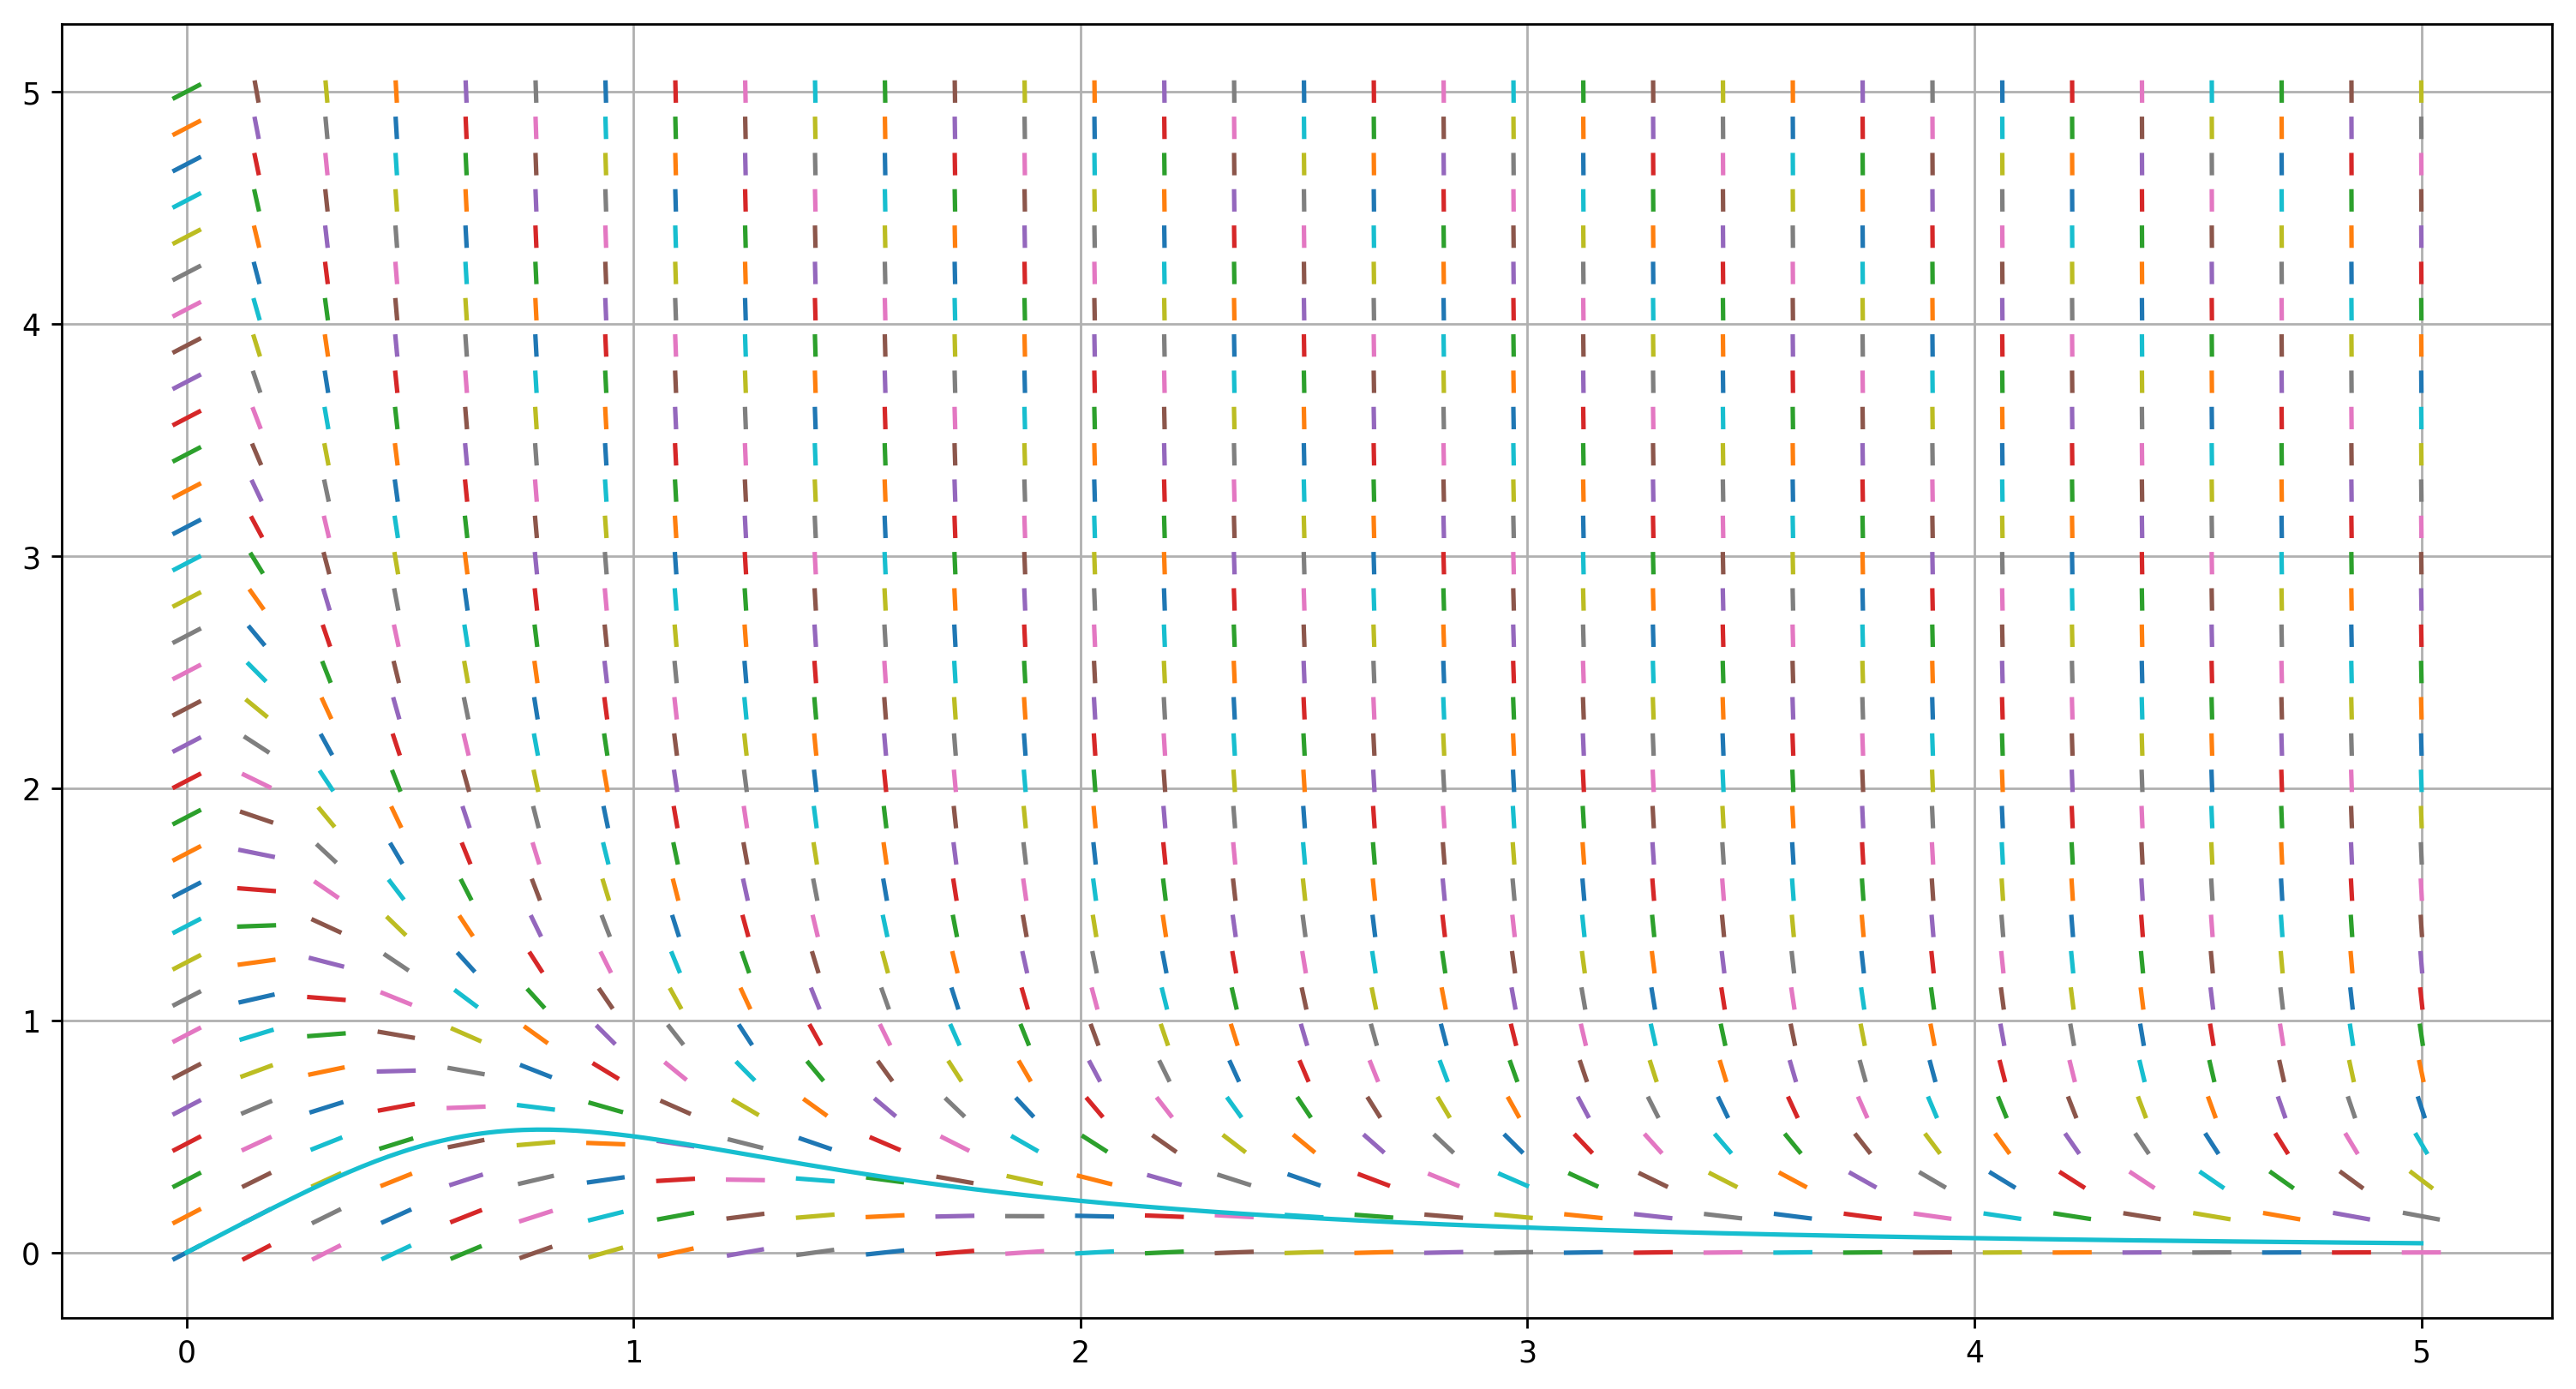

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# The Differential Equation we're solving
def dy_dx(x, y):
    return (-3 * x * y * y + 1/(1 + x ** 3))

# The solution to dy_dx for the first initial condition
def y_sol(x_arr):
    return [x / (1 + x ** 3) for x in x_arr]

def slope_field(dy_dx, x_bounds=[-10,10], y_bounds=[-10, 10], spacing=1, solution=None):
    x = np.linspace(x_bounds[0], x_bounds[1], (x_bounds[1]-x_bounds[0])/spacing)
    y = np.linspace(y_bounds[0], y_bounds[1],(y_bounds[1]-y_bounds[0])/spacing)
    
    plt.figure(figsize=(15, 8), dpi=250)
    # Generate the slope field
    for i in x:
        for j in y:
            slope = dy_dx(i, j)
            dx = np.sqrt(spacing/100/(1+(slope * slope)))
            dy = dx * slope
            sub_x = np.linspace(i-dx, i+dx, 2)
            sub_y = np.linspace(j-dy, j+dy, 2)
            plt.plot(sub_x, sub_y, solid_capstyle='projecting', solid_joinstyle='bevel')
    
    # Draw the solution to the provided differential equation
    if solution:
        new_x = np.linspace(x_bounds[0], x_bounds[1], (x_bounds[1]-x_bounds[0])/spacing*10)
        plt.plot(new_x, solution(new_x))
            
    plt.grid(True)
    plt.show()

slope_field(dy_dx, [0, 5], [0, 5], 0.15, y_sol)

### Question 2
The slope field shows that the slope exists at the provided initial condition (0, 0). And, using euler's method...

$$|\frac{\partial f}{\partial y}|=|\frac{\partial}{\partial y}(-3xy^2+\frac{1}{1+x^3})|$$

$$|\frac{\partial f}{\partial y}|=|-6xy|$$

This partial derivative is clearly continuous at the initial condition (0, 0) as well as the local range of $x$ for $0\leq x \leq 5$. This verifies that the Lipschitz condition holds true; which is a sufficient condition for the existence of a unique solution.

### Question 3

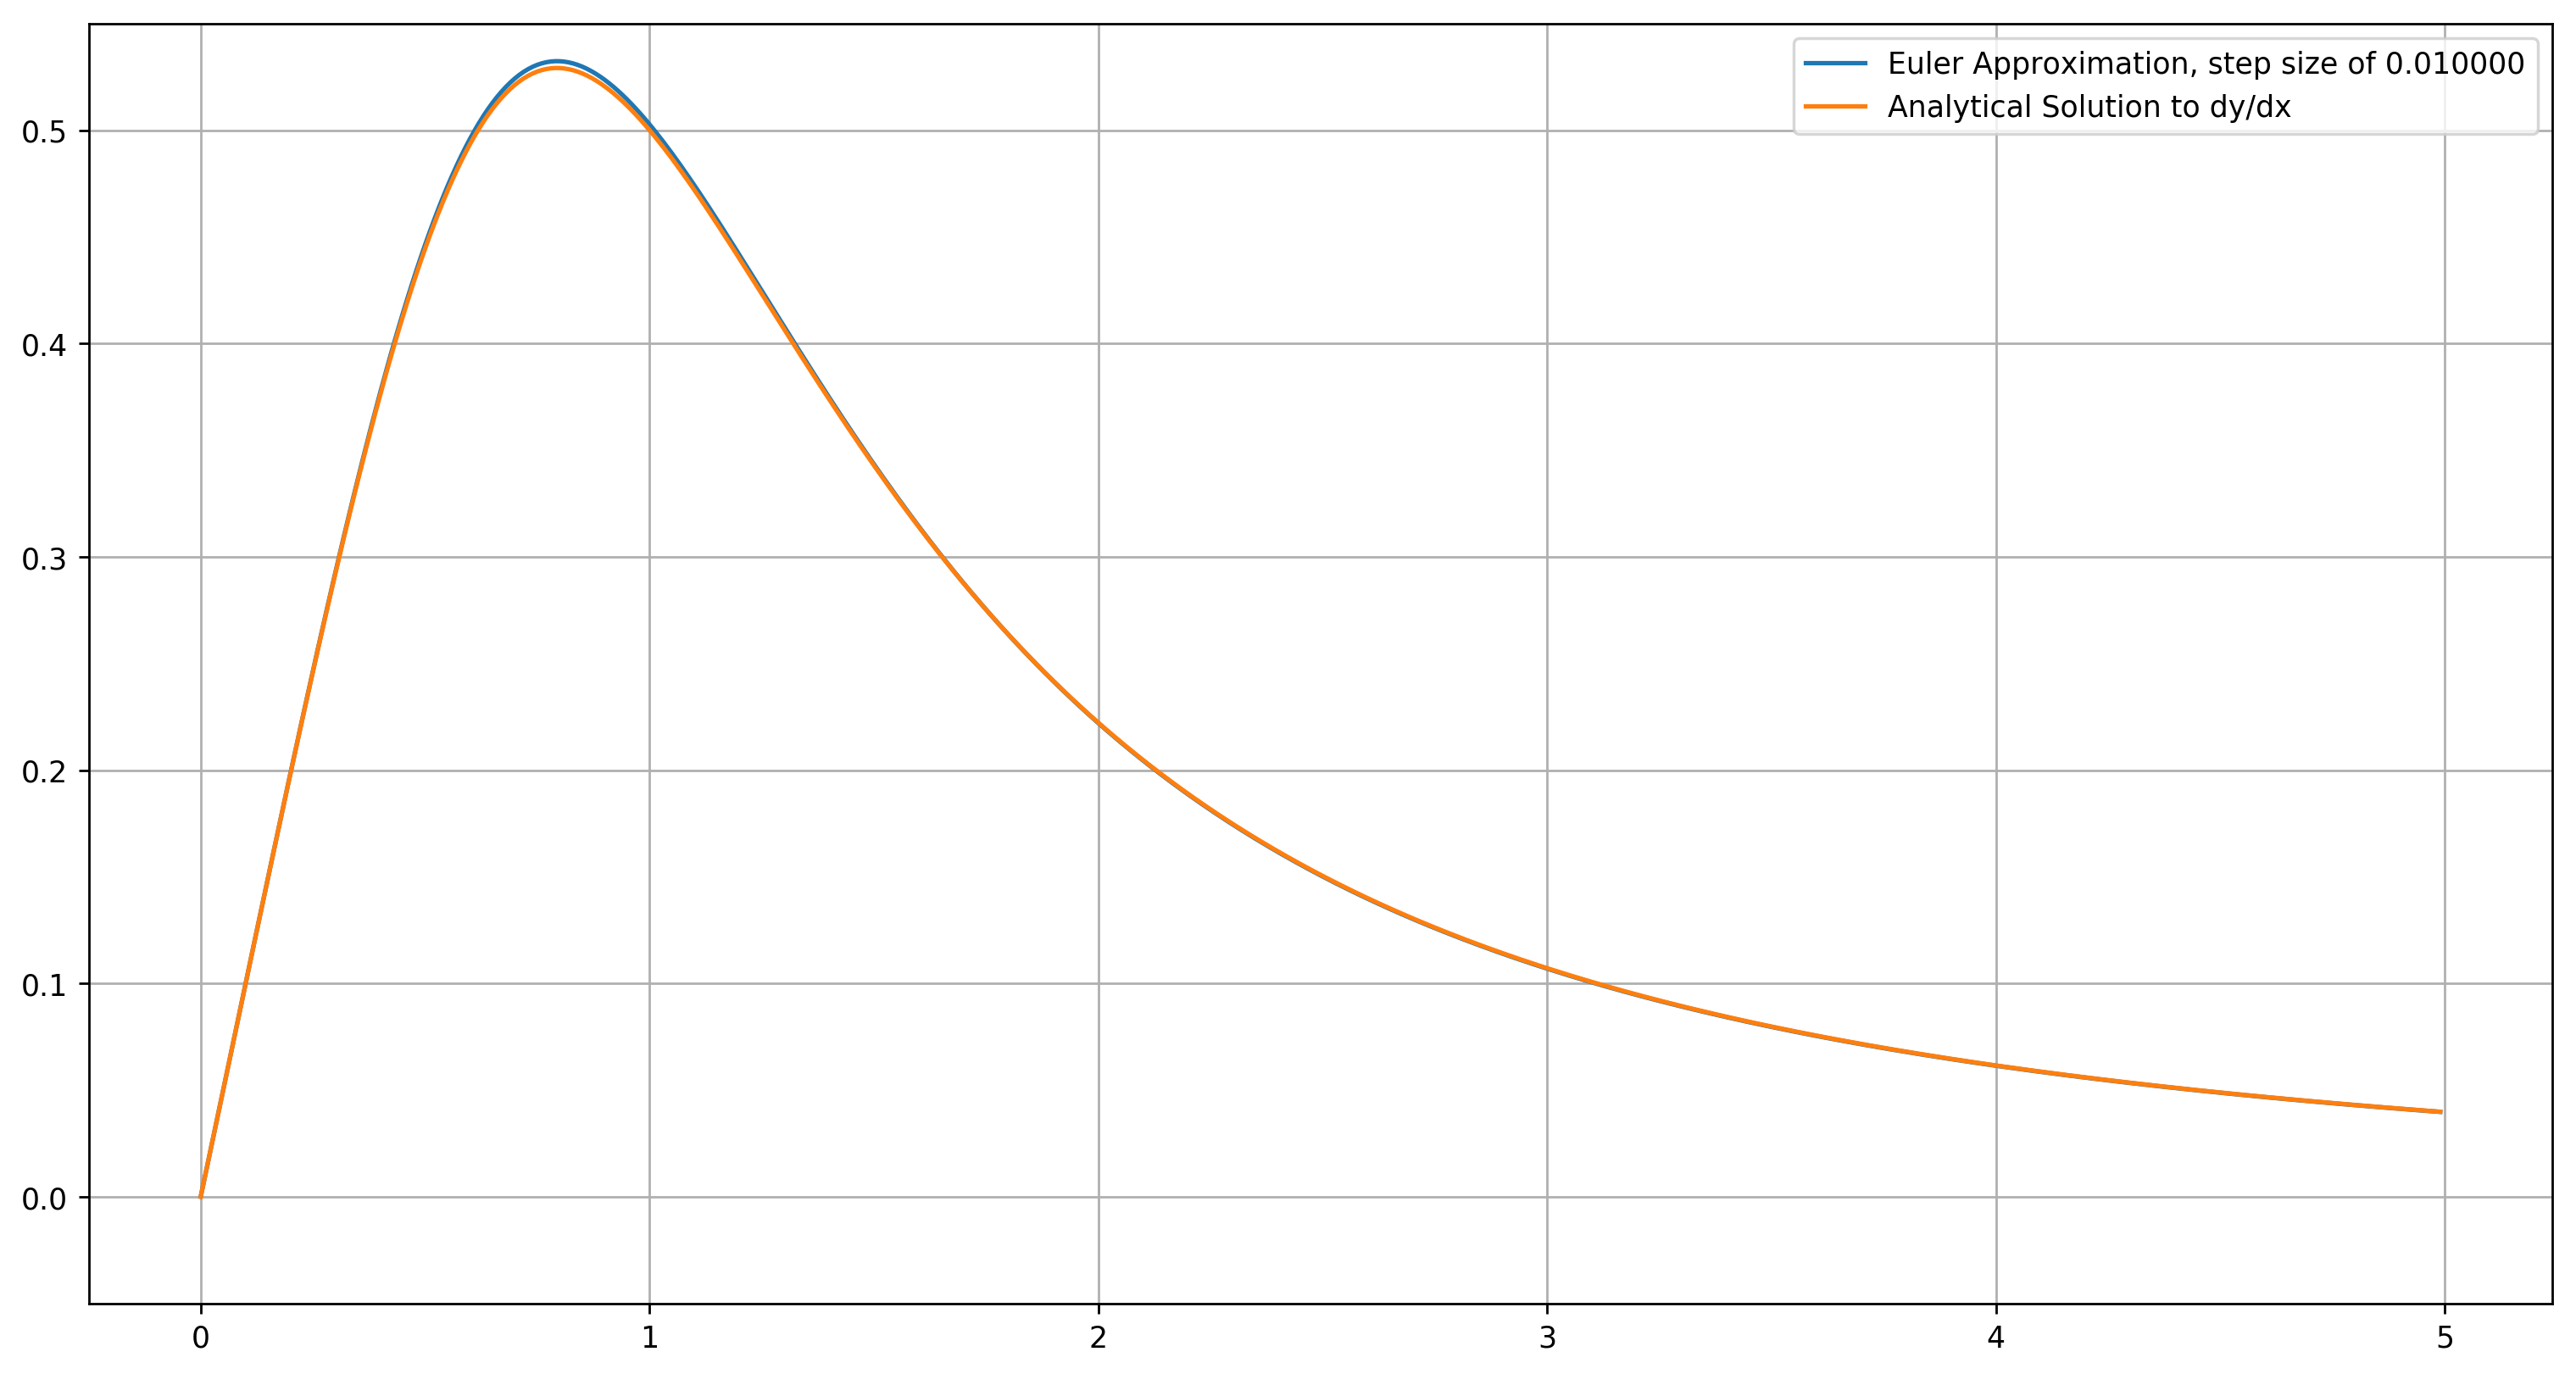

In [2]:
def euler_ODE(dy_dx, initial=[0, 0], x_bounds=[0, 0], step_size=0.01):
    x_v, y_v = [initial[0]], [initial[1]]
    
    t_0 = initial[0]
    y_0 = initial[1]
    for j in range(1, int((x_bounds[1] - x_bounds[0]) / step_size)):
        m = dy_dx(t_0, y_0)
        y_1 = y_0 + step_size * m
        t_1 = t_0 + step_size
        x_v.append(t_1) # Keep the x and y values as we go
        y_v.append(y_1)
        t_0, y_0 = t_1, y_1 # Reassign the values to adjust slope from
        
    return x_v, y_v

step_size = 0.01
x, y = euler_ODE(dy_dx, [0, 0], [0, 5], step_size)
plt.figure(figsize=(15, 8), dpi=250)
plt.plot(x, y, label="Euler Approximation, step size of %f" % step_size)
plt.plot(x, y_sol(x), label="Analytical Solution to dy/dx")
plt.ylim(-0.05, 0.55)
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

### Question 4
My solution is very close to the analytical solution of the provided differential equation. This also makes sense for the given slope field because it clearly shows that the solutions all converge to values between 0.1 and 0. Logically then, the Euler's method uses those approximated slopes that are visualized in the slope field, and estimates $y(x)$ accordingly.

## Part 2

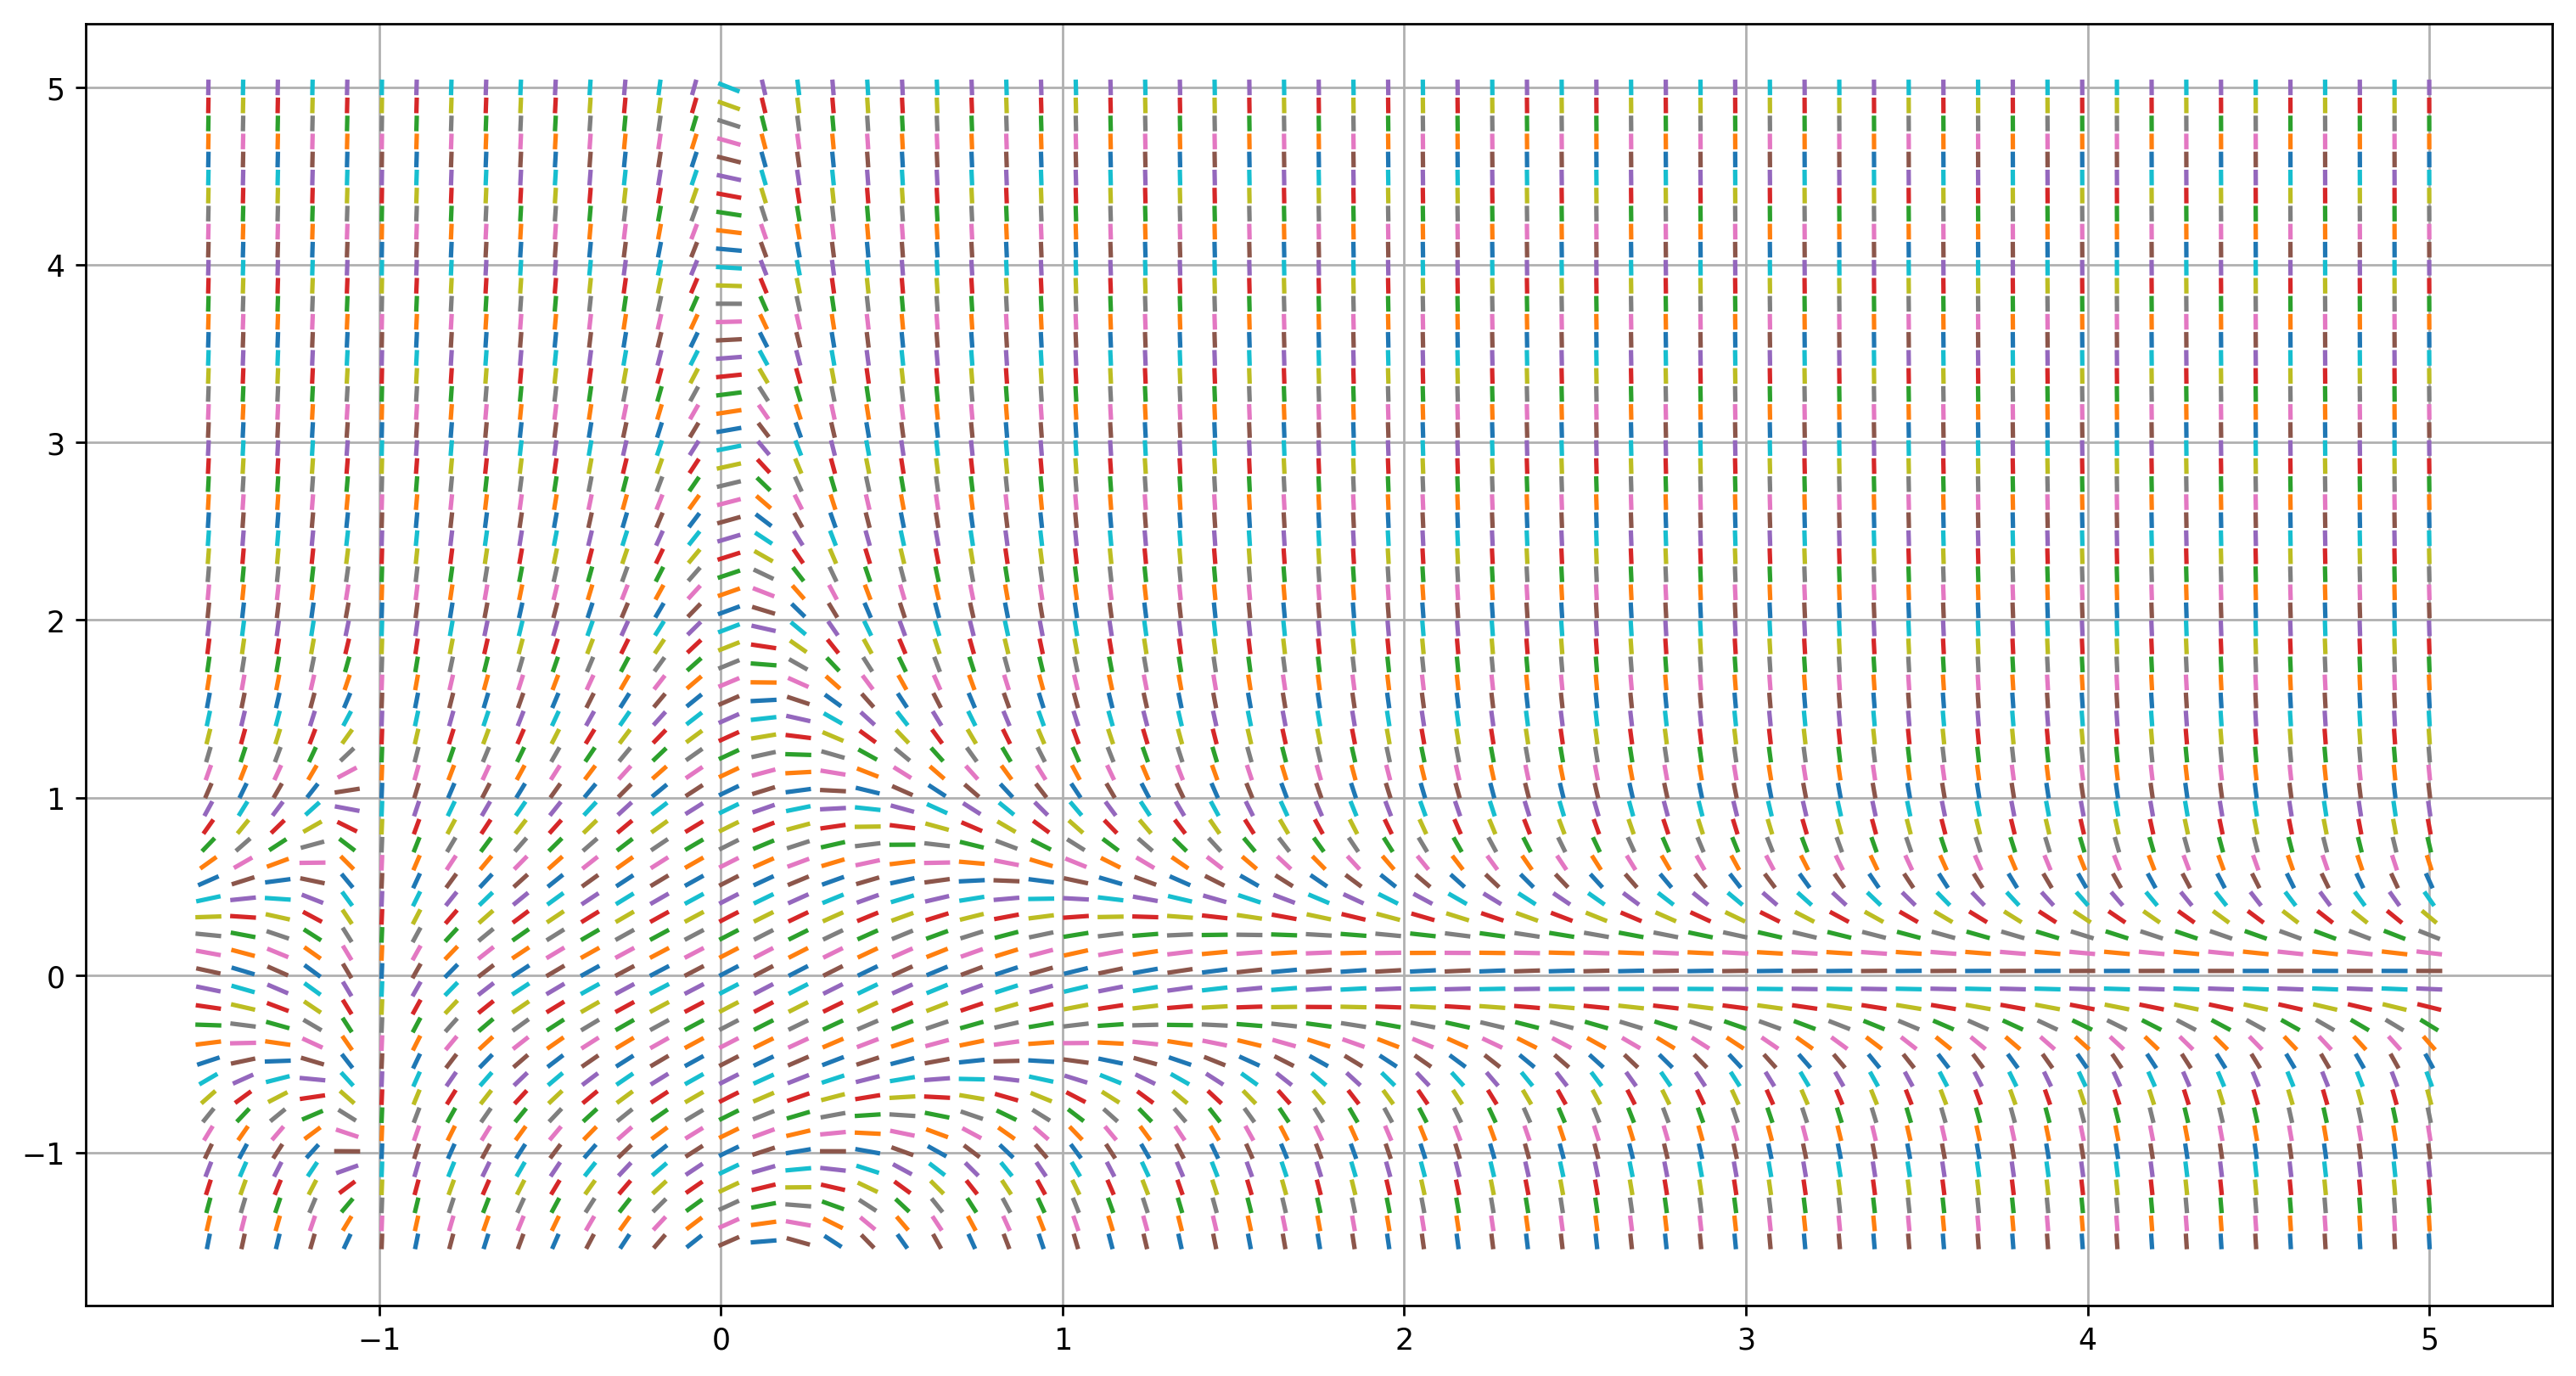

In [3]:
slope_field(dy_dx, [-1.5, 5], [-1.5, 5], 0.1)

### Question 2
Once again, the partial derivative of the provided $f(x,y)$ _is_ continuous on the given range of x values, meaning the Lipschitz condition is satisfied. __Although__, the slope field does show that the solution at the initial condition appears to be unbounded / undefined. This makes logical sense, as the given $f(x, y)$ is not defined at $x=-1$. 

### Question 3

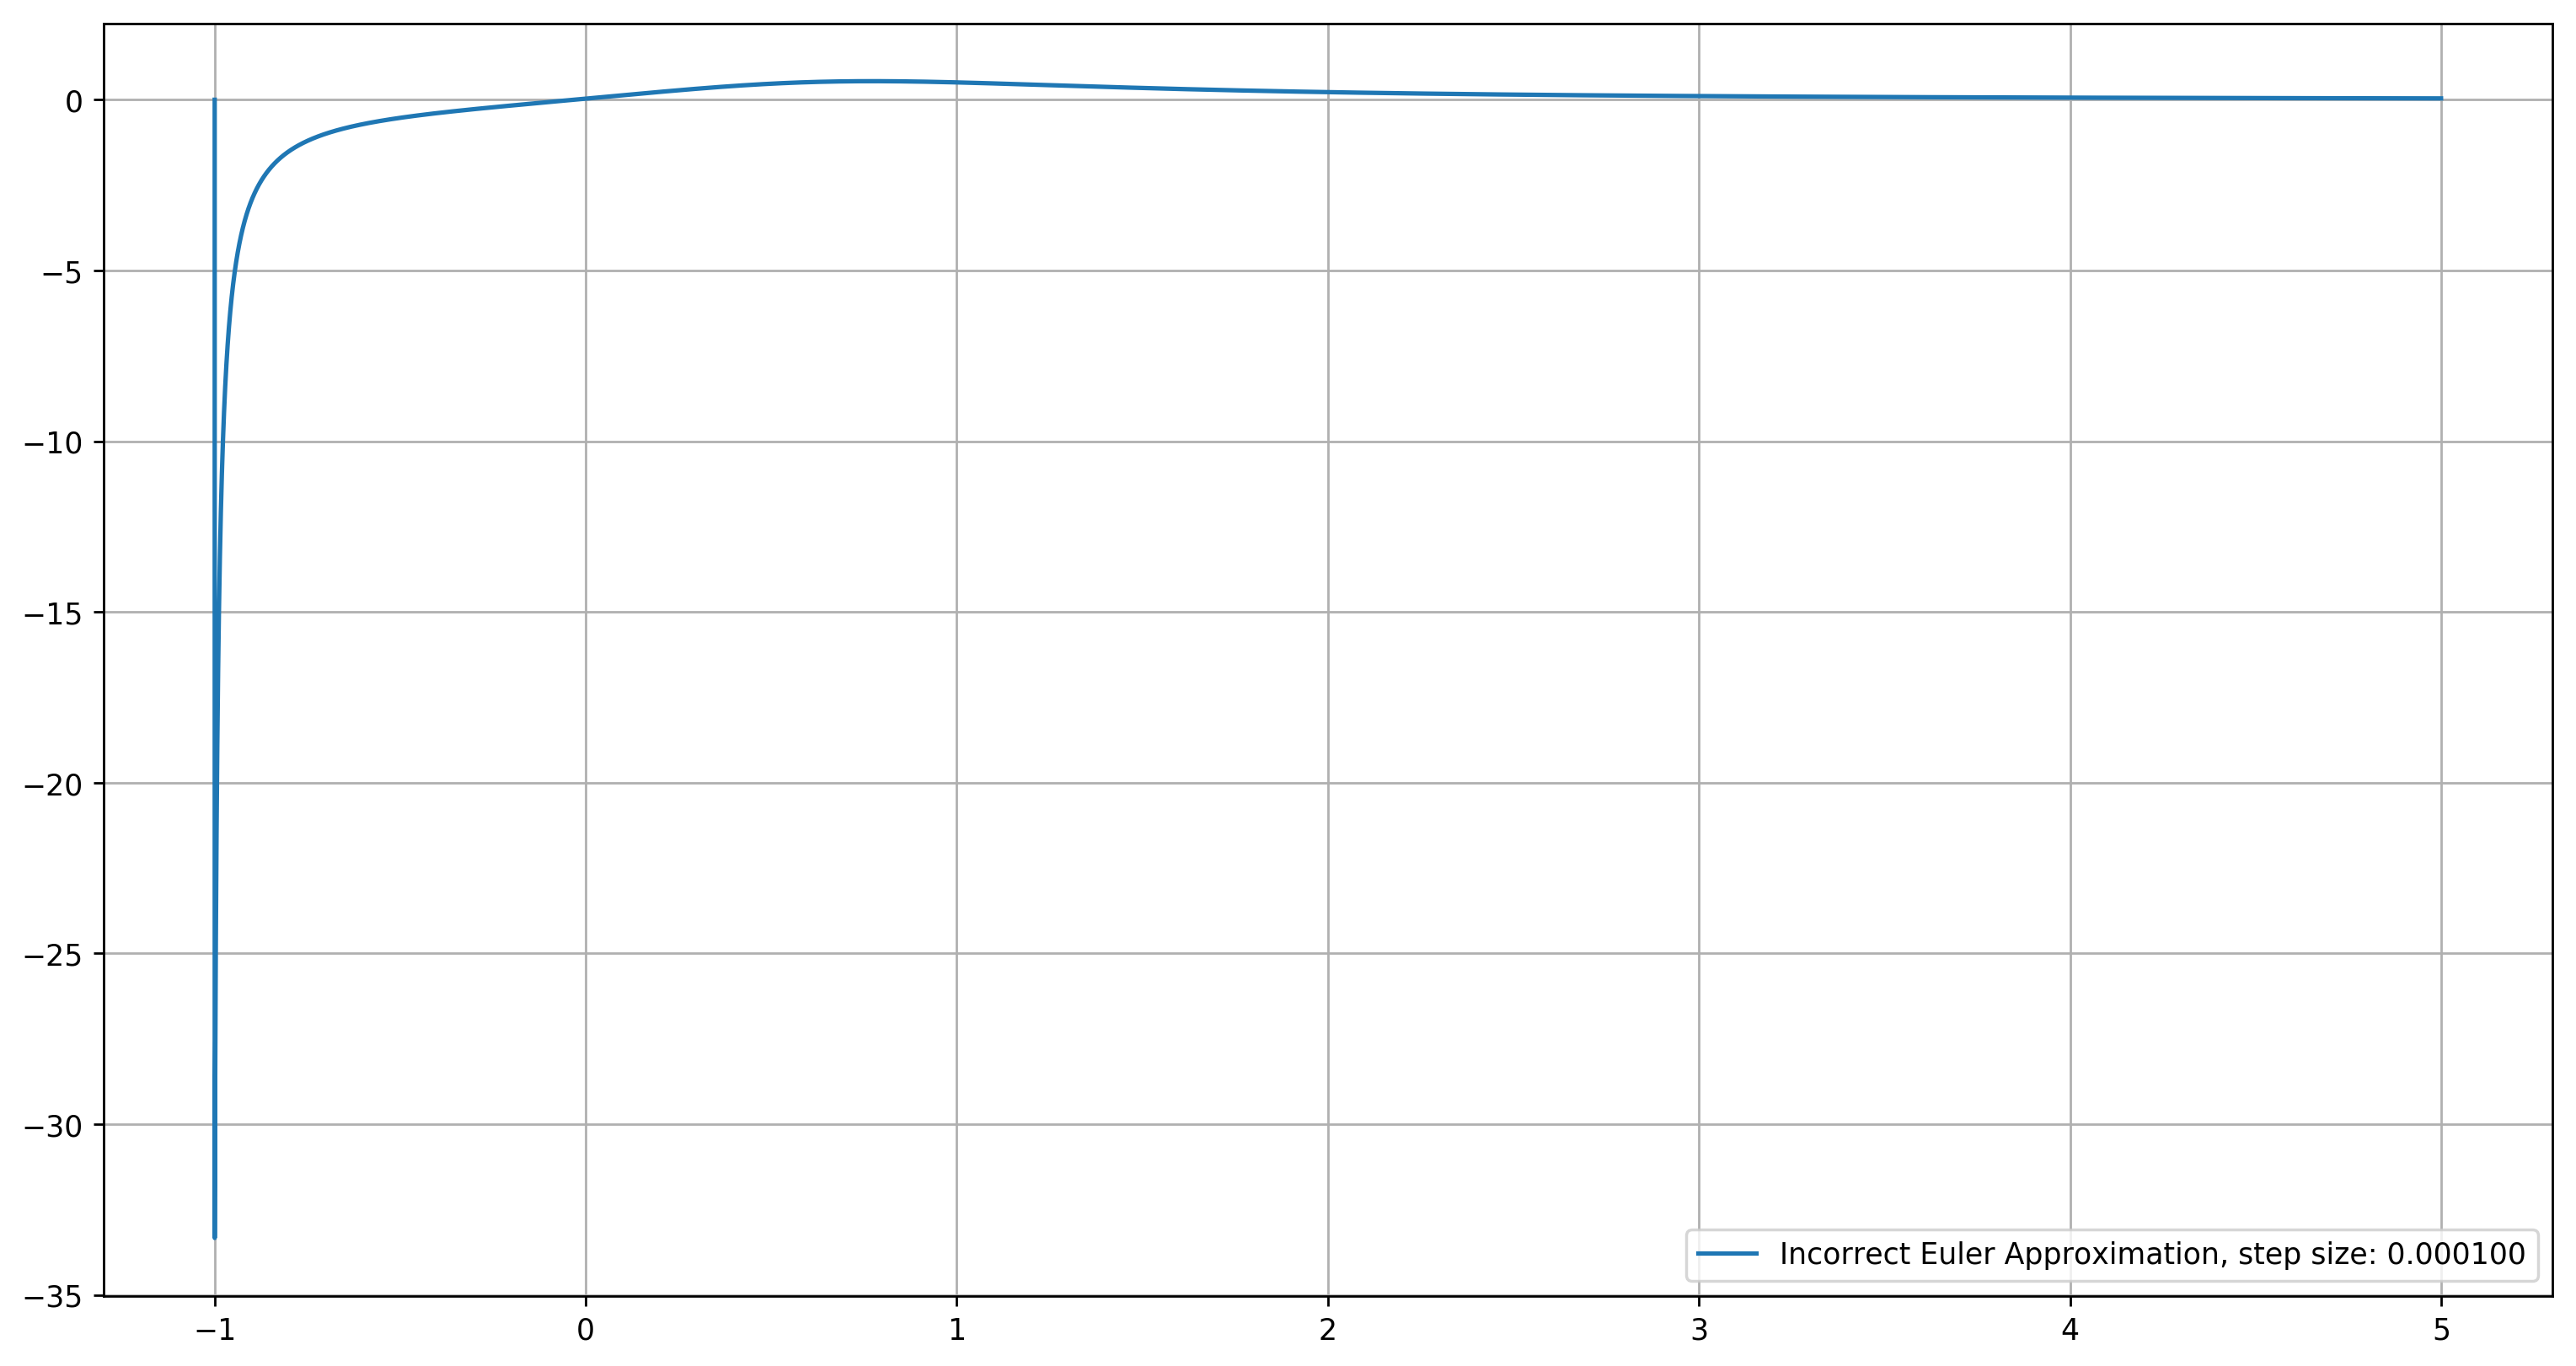

In [9]:
step_size = 0.0001
x, y = euler_ODE(dy_dx, [-1.000001, 0], [-1.000001, 5], step_size)
plt.figure(figsize=(15, 8), dpi=250)
plt.plot(x, y, label="Incorrect Euler Approximation, step size: %f" % step_size)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

As suspected, the Euler method fails to find a numerical solution with the given initial condition. This is due to the fact that the slope at the given initial condition is unbounded / undefined, resulting in the approximation of the solution to become equally unbounded and failing to evaluate any subsequent approximations, as the value exceeds those representable using floating point arithmetic.

The only way I was able to obtain the above graph is by changing the initial condition to be very slightly different than -1. This got rid of the division-by-zero problem and gives an approximate solution for this case. Although this also introduces additional round off and truncation error, as evident by the spike.